In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("./insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
x = df["age"]
y = df["expenses"]

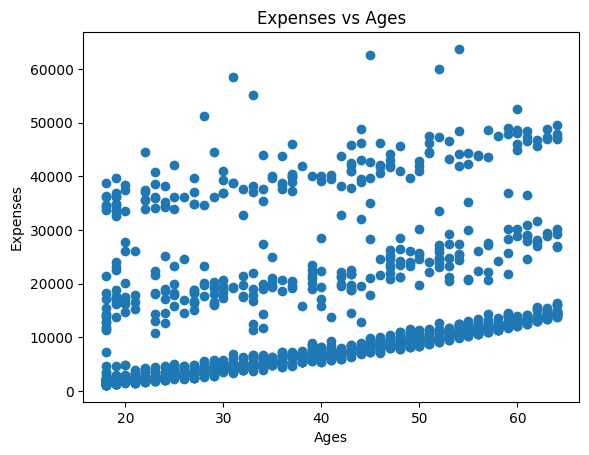

In [6]:
plt.scatter(x, y)
plt.xlabel("Ages")
plt.ylabel("Expenses")
plt.title("Expenses vs Ages")
plt.show()

In [7]:
x

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [8]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [9]:
y_min = y.min()
y_max = y.max()
y_normalized = (y - y_min) / (y_max - y_min)
print(y_normalized)

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: expenses, Length: 1338, dtype: float64


In [10]:
m = x.shape[0]
print(m)

1338


In [11]:
w = 200
b = 400

In [12]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    print(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

1338


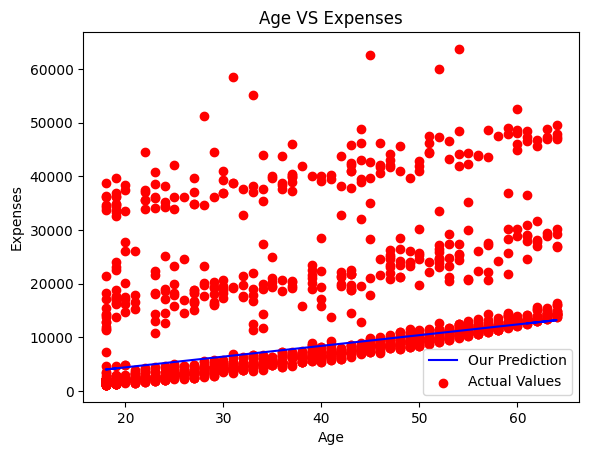

In [13]:
tmp_f_wb = compute_model_output(x, w, b)
plt.plot(x, tmp_f_wb, c="b", label="Our Prediction")
plt.scatter(x, y, c="r", label="Actual Values")
plt.title("Age VS Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend()
plt.show()

In [14]:
x_i = 19
expense_19yrs = w * x_i + b
print(f"Predicted Expense for 19 year olds is ${expense_19yrs:.0f}")

Predicted Expense for 19 year olds is $4200


In [15]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    cost_sum = 0
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [16]:
def compute_cost_for_plot(x, y, w, b): 
    m = x.shape[0] 
    cost_sum = 0
    my_cost = np.zeros(m)
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        my_cost[i] = (f_wb - y[i]) ** 2
    return my_cost

In [29]:
compute_cost(x, y, w, b)

161320696.07313058

In [18]:
# cost_plot = compute_cost_for_plot(x, y, w, b)
# plt.plot(cost_plot, w)
# plt.xlabel("W")
# plt.ylabel("Cost")
# plt.show()

In [19]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [23]:
compute_gradient(x, y_normalized, w, b)

(362563.3345533221, 8241.211166303992)

In [21]:
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [25]:
w = 0.0048
b = 0.0001
x_i = 19
expense_19yrs = w * x_i + b
print(f"Predicted Expense for 19 year olds after gradient Descent is ${expense_19yrs:.0f}")

Predicted Expense for 19 year olds after gradient Descent is $0


In [26]:
compute_cost(x, y, w, b)

161320696.07313058